### Figure 3
Reproducing Figure 3, showing the scrambling time for a range of values with a fit using a logarithmic Ansatz.

In [29]:
import os
from bisect import bisect_right
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#### Loading the data
See `/plotters/fig2.ipynb` for a detailed explanation of the data being loaded here.

In [30]:
data_dir = "data/entropy_data"
dirlist = os.listdir(data_dir)
entropies = {}
for file in dirlist:
    if file.endswith(".npz") and file.startswith("N"):
        data = np.load(os.path.join(data_dir, file))
        N = int(file.split("_")[0][1:])
        if N >= 400:
            for arr in data:
                entropies[N] = data[arr]

system_sizes = np.array(sorted(list(entropies.keys())))

eps = 10
cutoffs = [N / 4 - eps for N in system_sizes]
tscr = np.array(
    [
        bisect_right(entropies[system_sizes[i]], cutoffs[i])
        for i in range(len(system_sizes))
    ]
)

#### Reproducing the plot
Fitting the data to a logarithmic Ansatz:

In [31]:
def ansatz(x, a, b):
    return a * np.log(x) + b


popt, pcov = curve_fit(ansatz, system_sizes, tscr)

Plotting the figure:

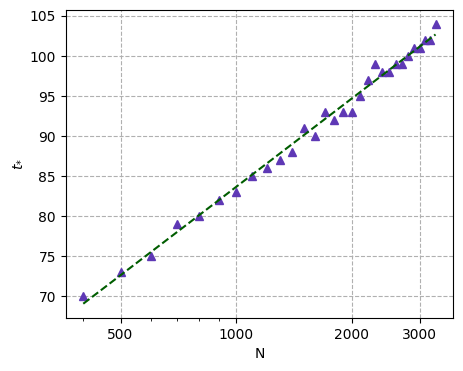

In [32]:
xticks = [500, 1000, 2000, 3000]
plt.figure(figsize=(5, 4))
for i, N in enumerate(system_sizes):
    plt.semilogx(N, tscr[i], "^", color="#5e38b5")
plt.semilogx(
    sorted(system_sizes),
    ansatz(system_sizes, popt[0], popt[1]),
    color="#005d00",
    linestyle="--",
)
plt.xticks(xticks)
plt.gca().get_xaxis().set_major_formatter(plt.ScalarFormatter())
plt.xlabel(r"N")
plt.ylabel(r"$t_{*}$")
plt.grid(linestyle="--")
plt.show()